# Diabetes Prediction

Made by: Nuh Priyonggo

This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes.

- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
-
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance tes
-
BloodPressure: Diastolic blood pressure (mm Hg-
- SkinThickness: Triceps skinfold thickness (m- m).
- Insulin: 2-Hour serum insulin (mu U/- ml).
- BMI: Body mass index (weight in kg / height in - m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.e: Age in years. diabetes.

## Import Library & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## EDA

### Overview

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


(2768, 10)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


### Cek Nilai Null

In [ ]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Cek Data Duplikat

In [ ]:
df.duplicated().sum()

0

### Cek Nilai 0

In [ ]:
check = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
for i in check.columns:
    nilai = df[i]
    rata_rata = nilai.mean()
    nilai_minimum = nilai.min()
    nilai_maksimum = nilai.max()
    jumlah_nol = (nilai == 0).sum()

    print(f"'{i}'")
    print(f"  Rata-rata: {rata_rata}")
    print(f"  Nilai Minimum: {nilai_minimum}")
    print(f"  Nilai Maksimum: {nilai_maksimum}")
    print(f"  Jumlah Nilai 0: {jumlah_nol}")
    print()

'Glucose'
  Rata-rata: 121.10260115606937
  Nilai Minimum: 0
  Nilai Maksimum: 199
  Jumlah Nilai 0: 18

'BloodPressure'
  Rata-rata: 69.13439306358381
  Nilai Minimum: 0
  Nilai Maksimum: 122
  Jumlah Nilai 0: 125

'SkinThickness'
  Rata-rata: 20.82442196531792
  Nilai Minimum: 0
  Nilai Maksimum: 110
  Jumlah Nilai 0: 800

'Insulin'
  Rata-rata: 80.1278901734104
  Nilai Minimum: 0
  Nilai Maksimum: 846
  Jumlah Nilai 0: 1330

'BMI'
  Rata-rata: 32.13739161849711
  Nilai Minimum: 0.0
  Nilai Maksimum: 80.6
  Jumlah Nilai 0: 39



Analisis:
* Glucose: Nilai 0 kemungkinan anomali.
* BloodPressure: Nilai 0 kemungkinan anomali.
* SkinThickness: Banyak nilai 0, yang kemungkinan besar adalah data yang hilang.
* Insulin: Banyak nilai 0, yang menunjukkan potensi data yang tidak dicatat.
* BMI: Nilai 0 tidak mungkin.

### Korelasi

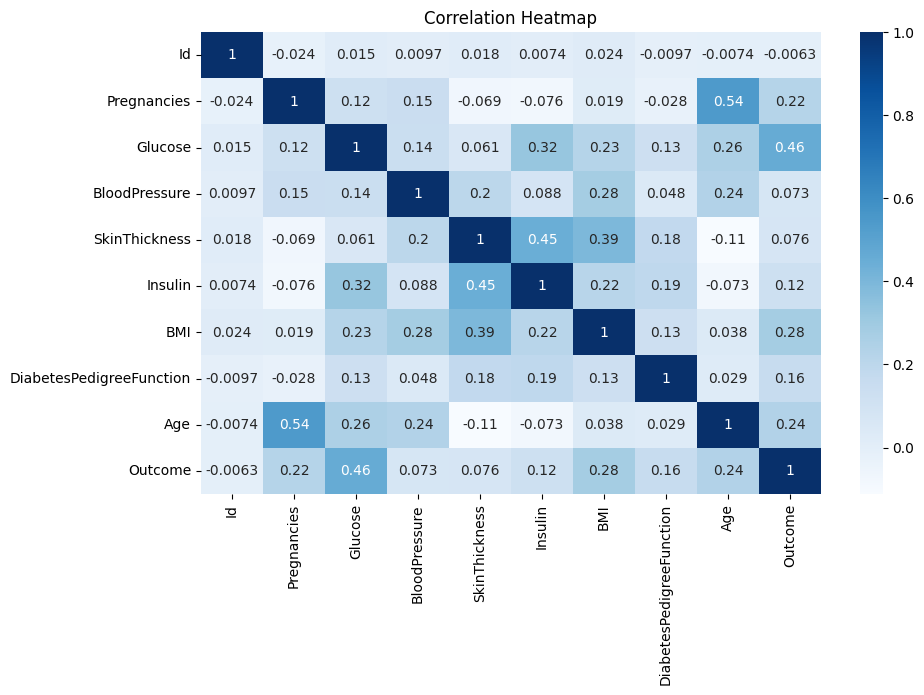

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

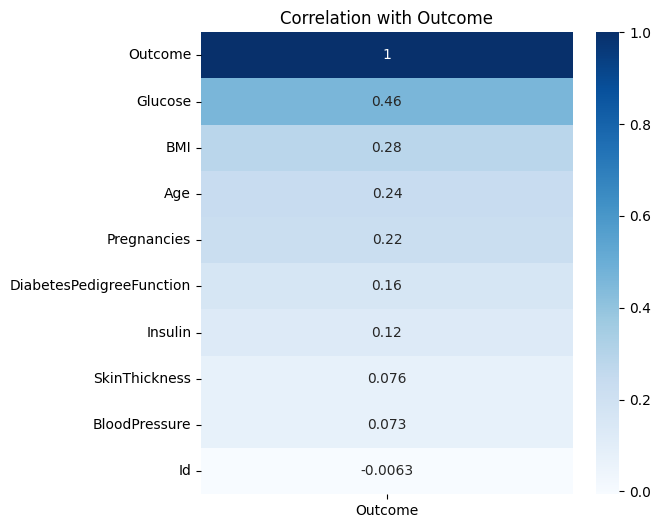

In [ ]:
outcome_cor = df.corrwith(df['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(outcome_cor, columns=['Outcome']), annot=True, cmap='Blues')

plt.title('Correlation with Outcome')
plt.show()

* Id tidak memiliki korelasi dengan Outcome

### Distribusi Data

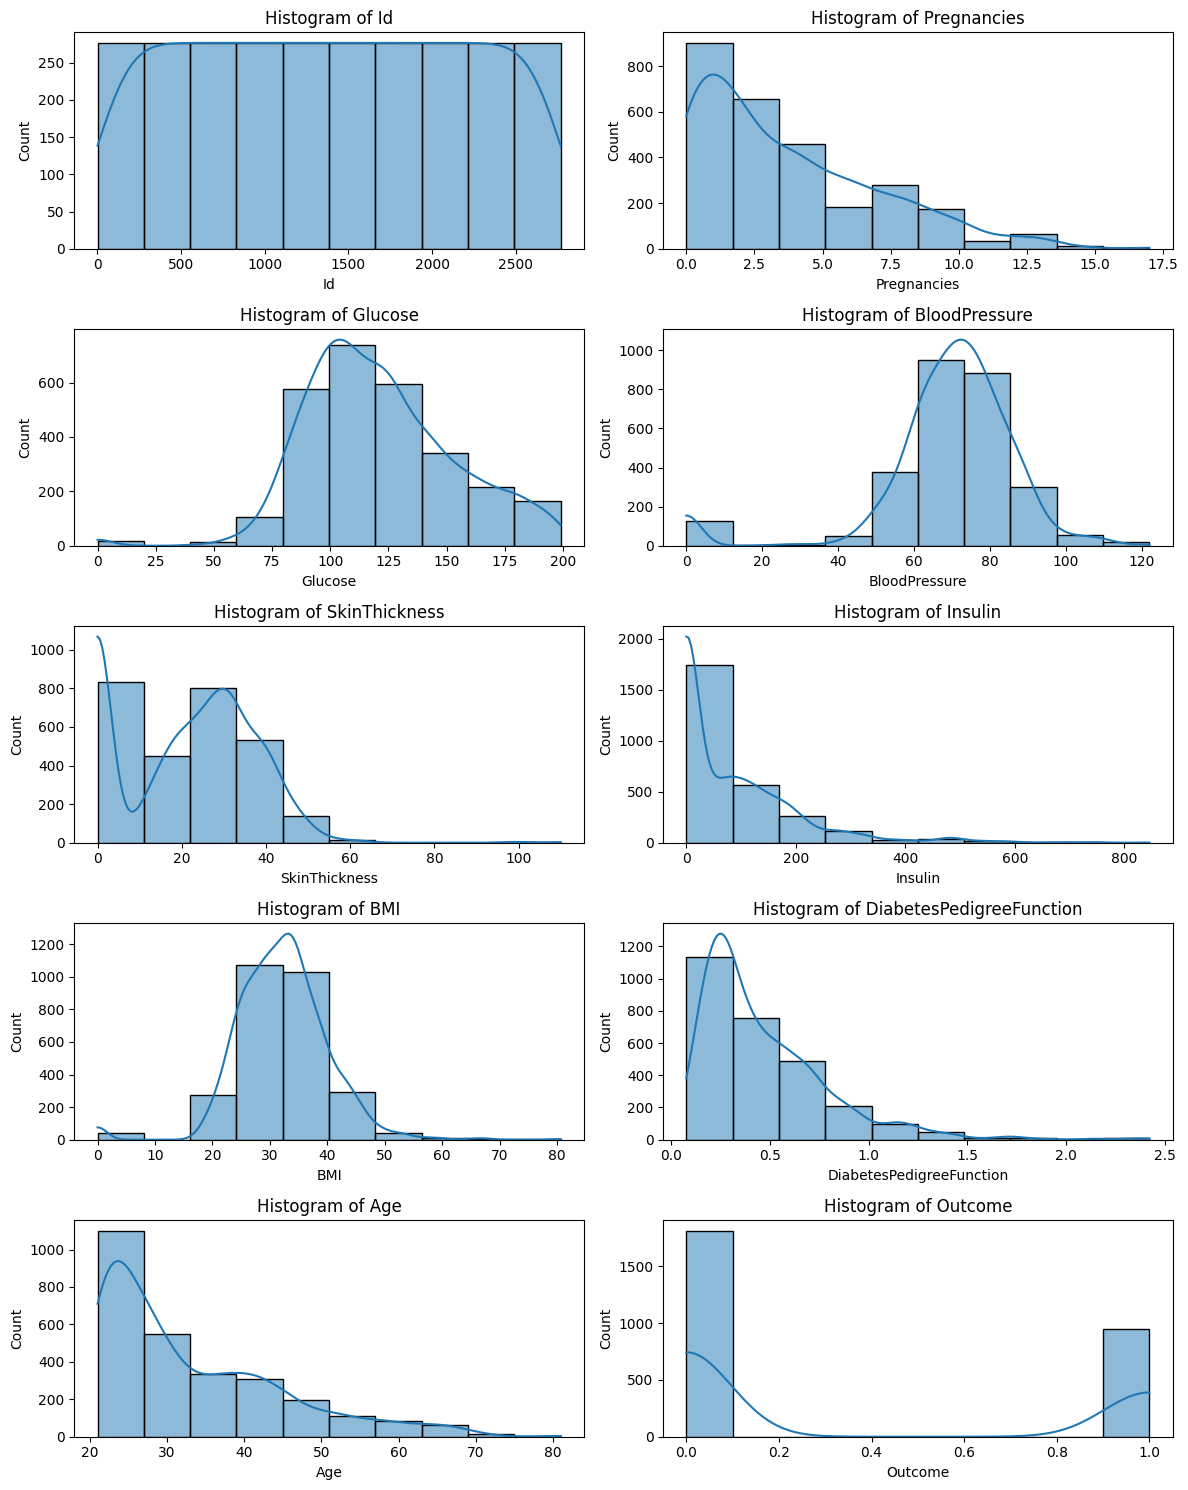

In [ ]:
num_plots = len(df.columns)

rows = (num_plots + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))

for idx, column in enumerate(df.columns):
    row_idx = idx // cols
    col_idx = idx % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    sns.histplot(x=df[column], kde=True, bins=10, ax=ax)
    ax.set_title(f"Histogram of {column}")

for idx in range(num_plots, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

* Sebagian besar individu berusia 20-50 tahun, dengan penurunan setelah usia tersebut.

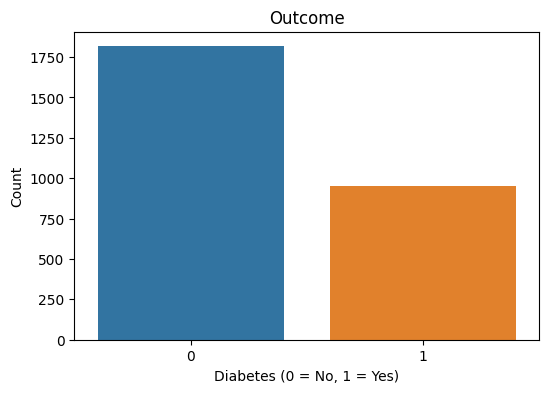

Outcome
0    1816
1     952
Name: count, dtype: int64

In [ ]:
counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0, 1], ['0', '1'])
plt.title('Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

counts

* Jumlah Outcome tidak seimbang

## Data Pre-processing

### Drop Id Column

Kolom Id dihapus karena tidak memiliki korelasi dengan outcome.

In [ ]:
df = df.drop(columns=['Id'])

### Hapus Record yang Mengandung Nilai 0

Record yang dihapus sesuai dengan EDA.

In [ ]:
df = df[df['Glucose'] !=0 ]
df = df[df['BMI'] !=0 ]
df = df[df['Insulin'] !=0 ]
df = df[df['BloodPressure'] !=0 ]
df = df[df['SkinThickness'] !=0 ]

In [ ]:
check = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
for i in check.columns:
    nilai = df[i]
    rata_rata = nilai.mean()
    nilai_minimum = nilai.min()
    nilai_maksimum = nilai.max()
    jumlah_nol = (nilai == 0).sum()

    print(f"'{i}'")
    print(f"  Rata-rata: {rata_rata}")
    print(f"  Nilai Minimum: {nilai_minimum}")
    print(f"  Nilai Maksimum: {nilai_maksimum}")
    print(f"  Jumlah Nilai 0: {jumlah_nol}")
    print()

'Glucose'
  Rata-rata: 122.78346180798879
  Nilai Minimum: 56
  Nilai Maksimum: 198
  Jumlah Nilai 0: 0

'BloodPressure'
  Rata-rata: 70.76524176594253
  Nilai Minimum: 24
  Nilai Maksimum: 110
  Jumlah Nilai 0: 0

'SkinThickness'
  Rata-rata: 29.2312543798178
  Nilai Minimum: 7
  Nilai Maksimum: 63
  Jumlah Nilai 0: 0

'Insulin'
  Rata-rata: 154.52627890679747
  Nilai Minimum: 14
  Nilai Maksimum: 846
  Jumlah Nilai 0: 0

'BMI'
  Rata-rata: 33.2468114926419
  Nilai Minimum: 18.2
  Nilai Maksimum: 67.1
  Jumlah Nilai 0: 0



## Modelling

### Pisah kolom fitur dan target

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

### Membagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menggunakan perbandingan 80% data train dan 20% data test

### Oversampling

Sebelum

In [ ]:
df['Outcome'].value_counts()

Outcome
0    960
1    467
Name: count, dtype: int64

**Proses oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={0:800,1:800}, random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

Sesudah

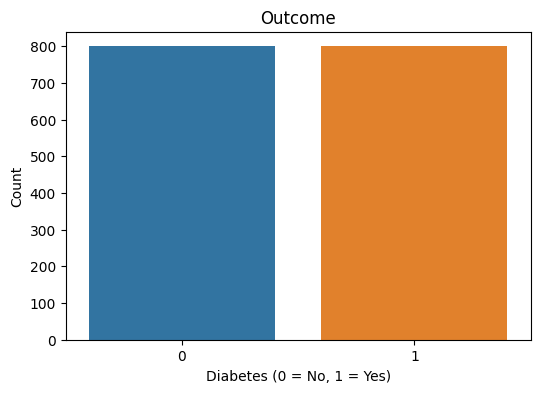

Outcome
1    800
0    800
Name: count, dtype: int64

In [ ]:
counts = y_train_resampled.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0, 1], ['0', '1'])
plt.title('Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

counts

### Korelasi dengan Outcome setelah Oversampling

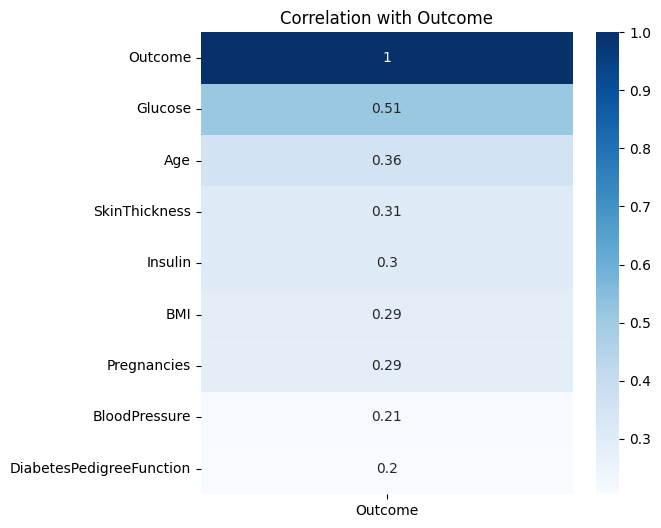

In [ ]:
train_data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

outcome_cor = train_data_resampled.corrwith(train_data_resampled['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(outcome_cor, columns=['Outcome']), annot=True, cmap='Blues')

plt.title('Correlation with Outcome')
plt.show()

* Mayoritas nilai korelasi naik, terutama age dari 0.24 menjadi 0.36 setelah oversampling

## 1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8706293706293706

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       202
           1       0.74      0.86      0.80        84

    accuracy                           0.87       286
   macro avg       0.84      0.87      0.85       286
weighted avg       0.88      0.87      0.87       286


Confusion Matrix:
 [[177  25]
 [ 12  72]]


## 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=10)
random_forest_model.fit(X_train_resampled, y_train_resampled)

y_pred = random_forest_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8986013986013986

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       202
           1       0.77      0.93      0.84        84

    accuracy                           0.90       286
   macro avg       0.87      0.91      0.88       286
weighted avg       0.91      0.90      0.90       286


Confusion Matrix:
 [[179  23]
 [  6  78]]


## 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred = logreg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7062937062937062

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77       202
           1       0.50      0.70      0.58        84

    accuracy                           0.71       286
   macro avg       0.68      0.71      0.68       286
weighted avg       0.75      0.71      0.72       286


Confusion Matrix:
 [[143  59]
 [ 25  59]]


## Evaluasi

Decision Tree
- Akurasi: 0.87 (87%)
- Untuk kelas 0 memiliki precision yang tinggi (0.94) dan recall (0.88), yang berarti cukup baik untuk kelas 0 dengan f1-score (0.91)
- Model memiliki f1-score (0.80) dan recall yang baik untuk kelas 1 (0.86), tetapi precision yang kurang (0.74) sehingga ada beberapa yang terlewat.

Random Forest
- Akurasi: 0.89 (89%)
- Precision tinggi untuk kelas 0 (0.97) menunjukkan bahwa model cukup baik untuk kelas 0 dengan f1-score (0.93)
- Recall yang baik untuk kelas 1 (0.93), memiliki precision yang lebih tinggi dari desicion tree yaitu (0.77)

Logistic Regression
- Akurasi: 0.70 (70%)
- Memiliki f1-score yang kurang baik pada kelas 0 (0.77) maupun kelas 1 (0.58)
- Model ini kurang baik dibandingkan 2 model lainnya

**Kesimpulan**

Model Random Forest memberikan kinerja terbaik secara keseluruhan dengan akurasi tertinggi (89%), precision dan recall yang baik untuk kedua kelas, sementara Decision Tree juga memiliki performa yang baik tetapi sedikit kurang optimal pada kelas 1. Logistic Regression kurang disarankan karena menunjukkan kinerja yang lebih rendah, terutama pada kelas 1.